# HOUSING: PRICE PREDICTION

Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

Importing the required libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Uploading the the data set

In [30]:
#Uploading the the data set
data_train =pd.read_csv('train_house.csv')
data_test=pd.read_csv('test_house.csv')

In [31]:
ds=pd.DataFrame(data=data_train)
dsTest=pd.DataFrame(data=data_test)
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


# EDA

In [32]:
ds.shape

(1168, 81)

In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

There are 1168 rows and 81 columns. There are 43 object type variable and 38 are integer type . Target varibale is continous and interger type.

In [34]:
dsTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

There are 292 rows and 80 columns. There are 43 object type variable and 38 are integer type.

In [35]:
ds.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

there are missng values in the data set. LotFrontage,PoolQC,Fence,MiscFeature,fire places,Alley have maximum null values.

<AxesSubplot:>

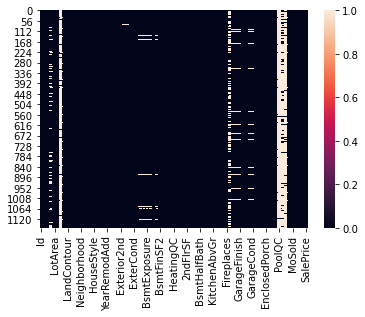

In [36]:
sns.heatmap(ds.isnull())

There are missing values in the data set

In [37]:
ds.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
dsTest.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

<AxesSubplot:>

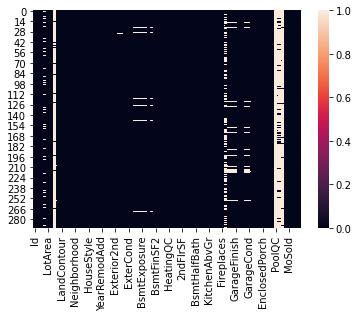

In [39]:
sns.heatmap(dsTest.isnull())

The Test data also has mssing values in the same variables as in Train Data.

In [40]:
# droping the column from dataset 
# some of the Variables not contributing, we can drop these columns.
#there are few columns having - almost 90% same observations. Seems useless. we can drop them.
ds.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Utilities','Condition1','Condition2','LandContour','LandSlope','RoofMatl','Heating',
        'Electrical','LowQualFinSF','BsmtHalfBath',
        'KitchenAbvGr','GarageQual','GarageCond','PavedDrive','PoolArea','3SsnPorch','MiscVal','Id'],axis=1,inplace=True)

dsTest.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Utilities','Condition1','Condition2','LandContour','LandSlope','RoofMatl','Heating',
        'Electrical','LowQualFinSF','BsmtHalfBath',
        'KitchenAbvGr','GarageQual','GarageCond','PavedDrive','PoolArea','3SsnPorch','MiscVal','Id'],axis=1,inplace=True)

In [41]:
ds.shape

(1168, 57)

In [42]:
dsTest.shape

(292, 56)

Now we have 56 columns in the data set.

In [43]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotArea        1168 non-null   int64  
 3   Street         1168 non-null   object 
 4   LotShape       1168 non-null   object 
 5   LotConfig      1168 non-null   object 
 6   Neighborhood   1168 non-null   object 
 7   BldgType       1168 non-null   object 
 8   HouseStyle     1168 non-null   object 
 9   OverallQual    1168 non-null   int64  
 10  OverallCond    1168 non-null   int64  
 11  YearBuilt      1168 non-null   int64  
 12  YearRemodAdd   1168 non-null   int64  
 13  RoofStyle      1168 non-null   object 
 14  Exterior1st    1168 non-null   object 
 15  Exterior2nd    1168 non-null   object 
 16  MasVnrType     1161 non-null   object 
 17  MasVnrArea     1161 non-null   float64
 18  ExterQua

<AxesSubplot:>

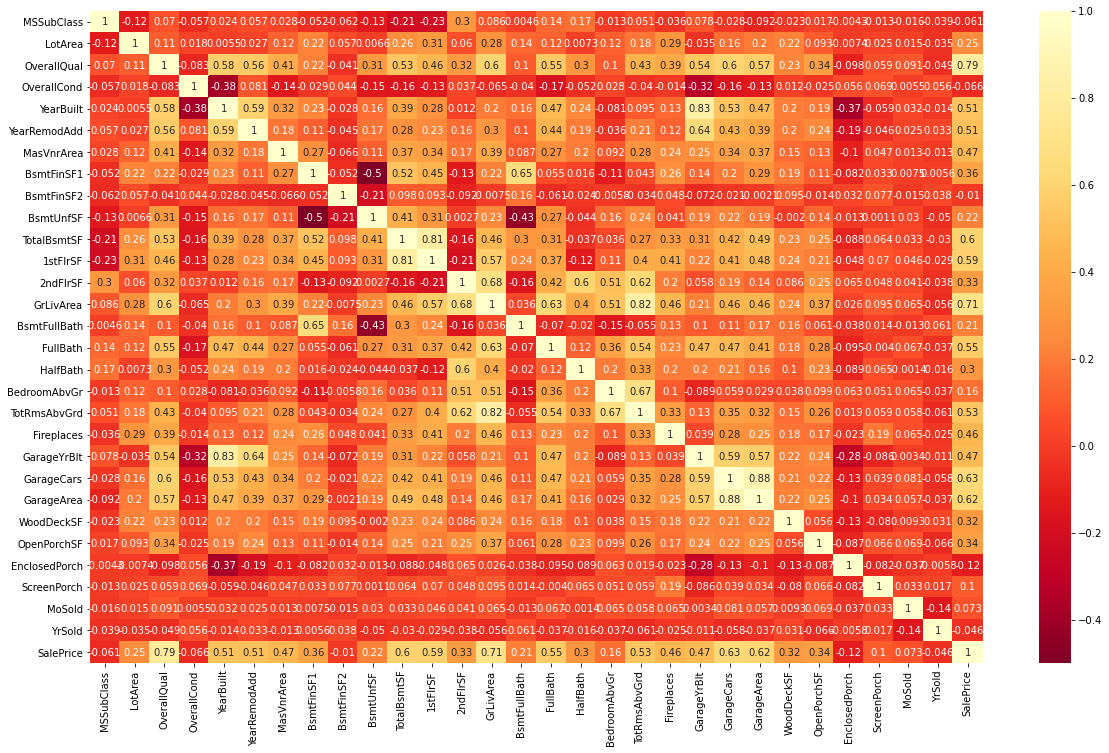

In [44]:
# Correlation Matrix ---Pearson Method
dfcor=ds.corr()
plt.figure(figsize=(20,12))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

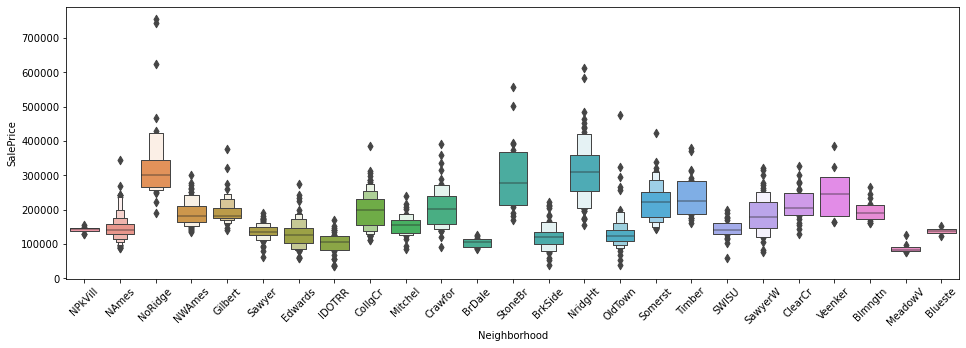

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.boxenplot(x='Neighborhood', y='SalePrice', data=ds, ax=ax)
plt.xticks(rotation=45)
plt.show()


# Bivariate Analysis

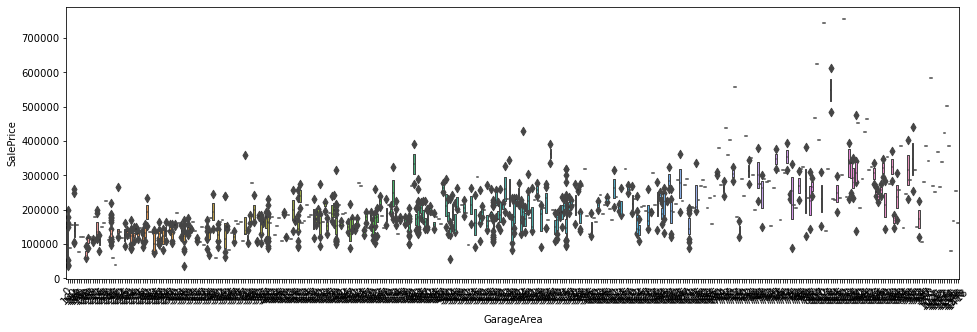

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.boxenplot(x='GarageArea', y='SalePrice', data=ds, ax=ax)
plt.xticks(rotation=45)
plt.show()

We can see a trend in data. The above plot clearly shows a linear relationship between ‘SalePrice’ and ‘GarageArea’. The ‘SalePrice’ increases with an increase in ‘GarageArea’.

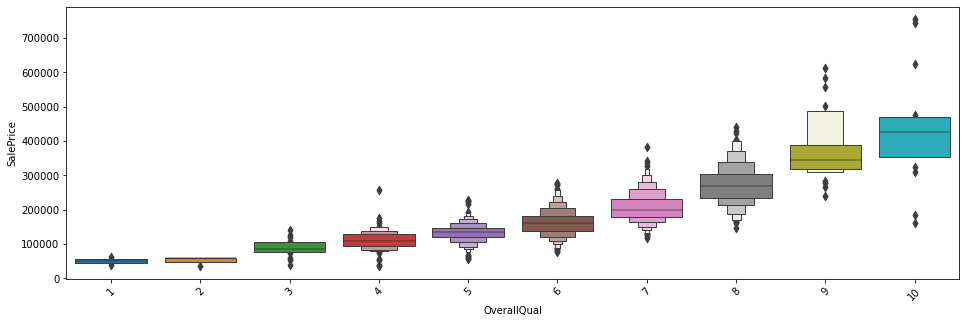

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.boxenplot(x='OverallQual', y='SalePrice', data=ds, ax=ax)
plt.xticks(rotation=45)
plt.show()

there is a linear relationship between OverallQual and SalePrice.

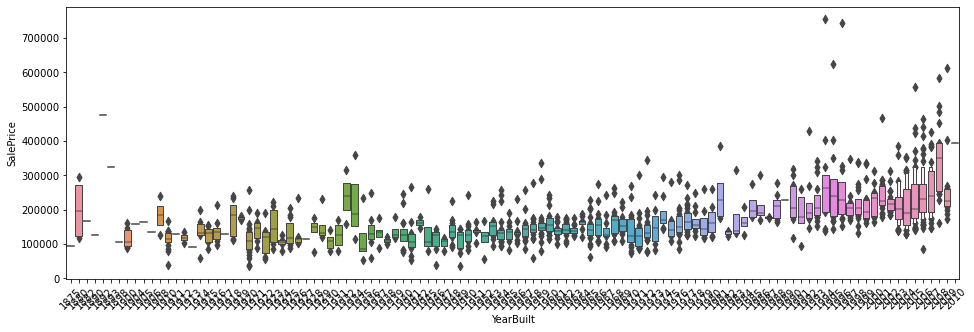

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.boxenplot(x='YearBuilt', y='SalePrice', data=ds, ax=ax)
plt.xticks(rotation=45)
plt.show()

The Joint Grid plot shows us the univariate and bivariate plots of variables. The univariate plot of ‘YearBuilt’ shows that the distribution is skewed towards the year 2000 and has a long tail which extends till 1900. The linear relationship between the variables is clearer in cases of recently built houses.

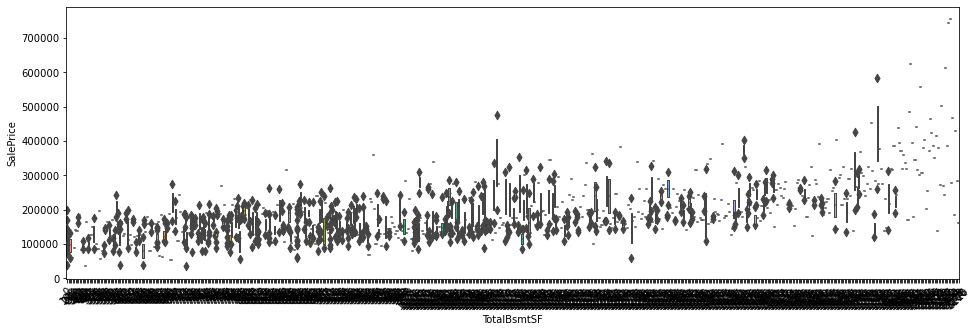

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.boxenplot(x='TotalBsmtSF', y='SalePrice', data=ds, ax=ax)
plt.xticks(rotation=45)
plt.show()

TotalBsmtSF is very highly correlated with our target variable SalePrice and also it follows a strong linear trend.

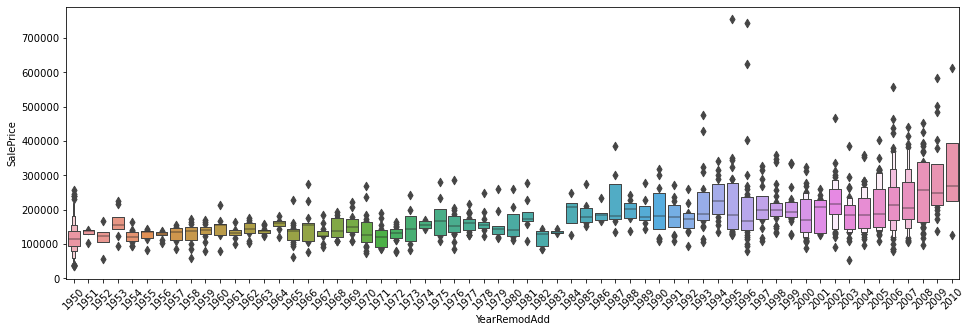

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.boxenplot(x='YearRemodAdd', y='SalePrice', data=ds, ax=ax)
plt.xticks(rotation=45)
plt.show()

he YearRemodAdd also has a linear relationship with SalePrice.

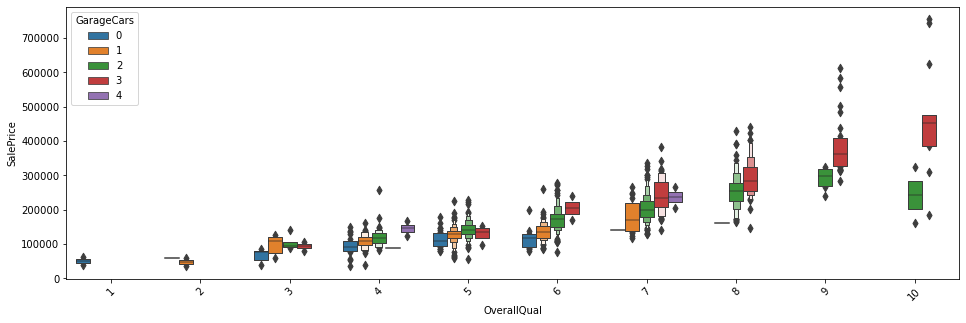

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.boxenplot(x='OverallQual', y='SalePrice', data=ds, hue= 'GarageCars')
plt.xticks(rotation=45)
plt.show()

The plot above presents linear regression models fit on the data grouped based on different values of ‘GarageCars’ represented by different colors. I’ll admit that the plot is quite a bit obscure. Let’s separate the groups into a grid of plots.

# Data Wrangling

In [18]:
ds.isnull().sum().sort_values(ascending = False).head(11)

ds.isnull().sum().sort_values(ascending = False).head(11).index

Index(['GarageYrBlt', 'GarageType', 'GarageFinish', 'BsmtExposure',
       'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea',
       'MasVnrType', 'SalePrice'],
      dtype='object')

In [19]:
dsTest.isnull().sum().sort_values(ascending = False).head(11)

dsTest.isnull().sum().sort_values(ascending = False).head(11).index

Index(['GarageFinish', 'GarageYrBlt', 'GarageType', 'BsmtFinType2',
       'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'MasVnrArea',
       'MasVnrType', 'RoofStyle'],
      dtype='object')

In [20]:
ds= ds.dropna(axis=0, how='any')

ds.isnull().sum().sort_values(ascending = False)

SalePrice        0
BsmtFinSF2       0
BsmtFinSF1       0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Neighborhood     0
LotConfig        0
LotShape         0
Street           0
LotArea          0
MSZoning         0
BsmtFinType2     0
BsmtUnfSF        0
SaleCondition    0
TotalBsmtSF      0
SaleType         0
YrSold           0
MoSold           0
ScreenPorch      0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageFinish     0
GarageYrBlt      0
GarageType       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtFullBath     0
GrLivArea        0
2ndFlrSF    

In [21]:
ds= dsTest.dropna(axis=0, how='any')

dsTest.isnull().sum().sort_values(ascending = False)

GarageFinish     17
GarageYrBlt      17
GarageType       17
BsmtFinType2      7
BsmtFinType1      7
BsmtExposure      7
BsmtCond          7
BsmtQual          7
MasVnrArea        1
MasVnrType        1
RoofStyle         0
Foundation        0
ExterCond         0
ExterQual         0
Exterior2nd       0
Exterior1st       0
SaleCondition     0
YearRemodAdd      0
BsmtFinSF1        0
OverallCond       0
OverallQual       0
HouseStyle        0
BldgType          0
Neighborhood      0
LotConfig         0
LotShape          0
Street            0
LotArea           0
MSZoning          0
YearBuilt         0
BsmtFinSF2        0
SaleType          0
TotRmsAbvGrd      0
YrSold            0
MoSold            0
ScreenPorch       0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
GarageArea        0
GarageCars        0
Fireplaces        0
Functional        0
KitchenQual       0
BsmtUnfSF         0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtFullBath      0
GrLivArea         0


In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 291
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     268 non-null    int64  
 1   MSZoning       268 non-null    object 
 2   LotArea        268 non-null    int64  
 3   Street         268 non-null    object 
 4   LotShape       268 non-null    object 
 5   LotConfig      268 non-null    object 
 6   Neighborhood   268 non-null    object 
 7   BldgType       268 non-null    object 
 8   HouseStyle     268 non-null    object 
 9   OverallQual    268 non-null    int64  
 10  OverallCond    268 non-null    int64  
 11  YearBuilt      268 non-null    int64  
 12  YearRemodAdd   268 non-null    int64  
 13  RoofStyle      268 non-null    object 
 14  Exterior1st    268 non-null    object 
 15  Exterior2nd    268 non-null    object 
 16  MasVnrType     268 non-null    object 
 17  MasVnrArea     268 non-null    float64
 18  ExterQual 

In [23]:
X_full = ds.dropna(axis=0, subset= ["SalePrice"])
print(X_full.shape)

y = X_full.SalePrice
X_full = X_full.drop(["SalePrice"], axis = 1)

X_full

KeyError: ['SalePrice']

# PCA

In [ ]:
X_full = ds.dropna(axis=0, subset= ["SalePrice"])
print(X_full.shape)

X_full_pca = X_full.copy()

numerical_cols = [cname for cname in X_full_pca.columns
                 if X_full_pca[cname].dtype in ["int64","float64"]]

X_scaled = X_full_pca[numerical_cols]

y = X_scaled.SalePrice

X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

X_scaled.head()

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_scaled.columns,  # and the rows are the original features
)
loadings

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
# Look at explained variance
plot_variance(pca);

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

In [ ]:
X_full = ds.dropna(axis=0, subset= ["SalePrice"])
print(X_full.shape)

y = X_full.SalePrice
X_full = X_full.drop(["SalePrice"], axis = 1)

X_full

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [ ]:
mi_scores = make_mi_scores(X_full, y)

print(mi_scores.head(20))

In [ ]:
df = X_full.copy()
df["feature_1"] =  df.KitchenQual + df.ExterQual + df.BsmtQual
df["feature_2"] =  df.GrLivArea*df.OverallQual / df.TotRmsAbvGrd
df["feature_3"] =  df.OverallQual * df.MoSold
df["feature_4"] =  df.Street + df.Neighborhood 

In [ ]:
mi_scores = make_mi_scores(df, y)

print(mi_scores.head(60))

# Model Building and check the MAE Score

In [ ]:
numerical_cols = [cname for cname in df.columns
                 if df[cname].dtype in ["int64","float64"]]
#numerical_cols
print("Length of numerical column : ",len(numerical_cols))

categorical_cols = [cname for cname in df.columns 
                    if df[cname].nunique() <= 36 and
                    df[cname].dtypes=="object"
                   ]
categorical_cols
print("Length of categorical column : ",len(categorical_cols))

my_col = numerical_cols + categorical_cols
X = df[my_col]

print("X : ", X.shape)

X_test = dsTest[my_col]
print("X_test : ", X.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
numerical_transformer = SimpleImputer(strategy = "constant")

categorical_transformer = Pipeline(steps=[
    ("impute", SimpleImputer (strategy = "constant")),
    ("onehot",OneHotEncoder(handle_unknown = "ignore"))
])


preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [ ]:
best_model = RandomForestRegressor(random_state=0)

my_pipeline = Pipeline(steps=[
        ("preprocessor",preprocessor),
        ("model",best_model)
    ])

In [ ]:
my_pipeline.fit(X_train,y_train)
    
y_pred = my_pipeline.predict(X_valid)

score = mean_absolute_error(y_valid, y_pred)

print(score)

In [ ]:
my_pipeline.fit(X,y)

y_pred_final = my_pipeline.predict(X_test)

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': y_pred_final})
output.to_csv('submission.csv', index=False)